# Итоговый проект

## Тема проекта 
**Анализ представленности декоративно-прикладного искусства (фарфор, куклы, посуда, статуэтки) в музеях России на основе данных Госкаталога Минкультуры РФ**

## Цель проекта
Изучить распределение предметов декоративно-прикладного искусства (фарфор, куклы, посуда, статуэтки) по музеям России, выявить регионы и музеи с наибольшим количеством таких экспонатов, а также проанализировать их временные периоды создания.

### Этап 1. Получение данных
Источник: сайт Минкультуры РФ (https://opendata.mkrf.ru/opendata), свободная лицензия

In [124]:
import requests
import pandas as pd
import json
from flatten_json import flatten
import time

list_of_all_dfs = []
key = "3b01311c3e5ef72baa430fea74746c960d9078384a7b44515fb65089ab233de6"

# создаем переменные. так как цель проекта это изучение декоративно-прикладного искусства, поэтому я беру соответсвующие ключевые слова
objects = ["фарфор", "кукла", "посуда", "статуэтка"]
object_cities = ["москва", "петербург", "казань", "новосибирск", "екатеринбург"]  # беру 5 самых больших городов России

# основной цикл запросов
for obj in objects:
    for city in object_cities:
        print(f"Предметы, связанные с'{obj.upper()}' в музеях города {city.upper()}")
        
        total_records = 0
        for s in range(0, 222000, 1000):
            time.sleep(0.3) # добавляем небольшую паузу между запросами, чтобы избежать блокировки
            
            # Формируем параметры запроса
            params = {
                "data.name": {"$search": obj}, # поиск по ключевому слову
                "data.museum.name": {"$search": city}, # поиск по городу
                "data.productionPlace": {"$ne": "россия"}
            }
            
            encoded_params = json.dumps(params, ensure_ascii=False)
            url = f"https://opendata.mkrf.ru/v2/museum-exhibits/$?f={encoded_params}&s={s}&l=1000"
                
            try:
                response = requests.get(url, headers={"X-API-KEY": key}, timeout=15)
                response.raise_for_status()
                data = response.json()
                    
                if data.get('data'):
                    records = [flatten(record) for record in data['data']]
                    df = pd.DataFrame(records)
                    
                        
                    # Добавляем столбцы с городом и типом объекта
                    df['city'] = city.upper()
                    df['object_type'] = obj.upper()
                        
                    # сохранение в общий список    
                    list_of_all_dfs.append(df)
                    total_records += len(df)
                    print(f"Найдено: {len(df)} записей")
                else:
                    break
                        
            except Exception as e:
                print(f"Ошибка для {city}, период {period}: {e}")
                break

Предметы, связанные с'ФАРФОР' в музеях города МОСКВА
Найдено: 558 записей
Предметы, связанные с'ФАРФОР' в музеях города ПЕТЕРБУРГ
Найдено: 1000 записей
Найдено: 99 записей
Предметы, связанные с'ФАРФОР' в музеях города КАЗАНЬ
Найдено: 7 записей
Предметы, связанные с'ФАРФОР' в музеях города НОВОСИБИРСК
Найдено: 108 записей
Предметы, связанные с'ФАРФОР' в музеях города ЕКАТЕРИНБУРГ
Найдено: 198 записей
Предметы, связанные с'КУКЛА' в музеях города МОСКВА
Найдено: 464 записей
Предметы, связанные с'КУКЛА' в музеях города ПЕТЕРБУРГ
Найдено: 894 записей
Предметы, связанные с'КУКЛА' в музеях города КАЗАНЬ
Найдено: 10 записей
Предметы, связанные с'КУКЛА' в музеях города НОВОСИБИРСК
Найдено: 269 записей
Предметы, связанные с'КУКЛА' в музеях города ЕКАТЕРИНБУРГ
Найдено: 33 записей
Предметы, связанные с'ПОСУДА' в музеях города МОСКВА
Найдено: 252 записей
Предметы, связанные с'ПОСУДА' в музеях города ПЕТЕРБУРГ
Найдено: 323 записей
Предметы, связанные с'ПОСУДА' в музеях города КАЗАНЬ
Найдено: 1 запис

#### Сохранение в единый датафрейм

In [125]:
df_all = pd.DataFrame()
for df in list_of_all_dfs:
    df_all = pd.concat([df_all,df])

print(f'Записей всего: {len(df_all)}')

Записей всего: 5549


In [126]:
df_all.to_csv('data.csv', index=False) # сохранение данных в формате csv

In [127]:
df_all

,_id,nativeId,hash,data_id,data_name,data_description,data_partsCount,data_regNumber,data_invNumber,data_gikNumber,...,changes_0_diff_7_value_id,changes_0_diff_2_value_url,changes_0_diff_3_value_url,changes_0_diff_4_value_url,changes_0_diff_5_value_url,changes_0_diff_42_op,changes_0_diff_42_path,changes_0_diff_43_op,changes_0_diff_43_path,data_images_9_url
0,5c3e1aa793fa687ca4b69069,10428371,2018-01-18T11:53:53.726Z,10428371,Чаша фарфоровая.,Чаша в виде бокала из белого глазурованного фа...,1,10319985.0,ДПИ-352,МГМЕ КП-2360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c3e1aa793fa687ca4b69079,10428375,2018-01-18T11:53:53.726Z,10428375,"Чаша молочная фарфоровая. Москва, Производство...",Чаша в виде бокала из белого глазурованного фа...,1,10319981.0,ДПИ-348,МГМЕ КП-2357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c3e1aa793fa687ca4b69080,10428378,2018-01-18T11:53:53.726Z,10428378,"Блюдо круглое фарфоровое. Дулево, «Товариществ...","Блюдо круглой формы, глубокое, с волнистыми кр...",1,10319978.0,ДПИ-342,МГМЕ КП-2353/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c3e1aa793fa687ca4b69084,10428379,2018-01-18T11:53:53.726Z,10428379,"Блюдо круглое фарфоровое. Дулево, «Товариществ...","Блюдо круглой формы, мелкое; по бортику - надг...",1,10319977.0,ДПИ-340,МГМЕ КП-2352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c3e1aa793fa687ca4b69094,10428383,2018-01-18T11:53:53.726Z,10428383,"Блюдо овальное фарфоровое. Дулево, «Товарищест...","Блюдо овальное, с волнистыми краями; по бортик...",1,10319973.0,ДПИ-347,МГМЕ КП-2356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,629927474db907029e521533,36149218,2022-05-17T07:42:02.229Z,36149218,Статуэтка «Слон»,Статуэтка слона из белого камня с серыми и бур...,1,35943916.0,П-1004,ЕМИИ КП-6698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,644064cc55639a7d0b96910d,42145263,2023-03-21T05:28:42.181Z,42145263,Деталь статуэтки – нога в чулке и ботинке.,NaN,1,41911016.0,,МИЕ 11344/16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,64bc52645e4d540e874d1faf,44610547,2023-07-14T14:42:46.201Z,44610547,Канделябр «Ветка с листьями и статуэткой»,на три свечи. На постаменте фигура женщины с к...,1,44374679.0,П-88,ЕМИИ КП-3357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,64bc52645e4d540e874d1f8a,44610599,2023-07-14T14:42:46.201Z,44610599,Статуэтка «Фехтовальщица»,На прямоугольной подставке - фигура стоящей де...,1,44374642.0,П-3203,ЕМИИ КП-11009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Этап 2. Exploratory data analysis

Я получила данные о предметах декоративно-прикладного искусства по пяти крупным городам России, сейчас я могу сделать разведочный анализ по этим данным

In [128]:
import pandas as pd

df = pd.read_csv("data.csv")

# Удаление дубликатов и пустых значений
df = df.drop_duplicates(subset=['_id'])

C:\Users\Ольга\AppData\Local\Temp\ipykernel_24500\1502970609.py:3: DtypeWarning: Columns (157,162,165,170,173,176,197,198,199,200,201,202,203,204,205,206,207,214,217,219,220,221,222,223,224,225,242,243,244,245,246,247,250,251,253,254,255,267,268,269,270,271,272,273,274,275,276,277,280,281,282,283,284,285,286,287,288,289,290,291,292,295,298,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,353,354,355,358,359,384,393,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,484,485,486,487,488,489,490,491,492) have mixed types. Specify dtype option on import or set low_memor

Убираю лишние колонки для удобства

In [129]:
df = df.loc[:, ~df.columns.str.startswith('changes_')]
df = df.loc[:, ~df.columns.str.startswith('data_technologies_')]
df = df.loc[:, ~df.columns.str.startswith('data_images_')]

In [130]:
df.columns # какие колонки есть в датасете

Index(['_id', 'nativeId', 'hash', 'data_id', 'data_name', 'data_description',
       'data_partsCount', 'data_regNumber', 'data_invNumber', 'data_gikNumber',
       'data_type', 'data_statusId', 'data_museum_id', 'data_museum_name',
       'data_museum_code', 'data_museum_inn', 'data_typology_id',
       'data_typology_name', 'data_typology_obsolete', 'data_dimStr',
       'data_startDate', 'data_finishDate', 'data_precision', 'data_periodStr',
       'data_regDate', 'data_extSystem_id', 'status', 'errorFields_0_keyword',
       'errorFields_0_dataPath', 'errorFields_0_schemaPath',
       'errorFields_0_params_type', 'errorFields_0_message', 'nativeName',
       'activated', 'created', 'modified', 'odSetVersions_0', 'odSetVersion',
       'updateSession', 'odSchema', 'dataset', 'data_typology_code',
       'data_authors_0', 'data_productionPlace', '0', '1', '2_0',
       'data_findPlace', 'data_extSystem', 'data_authors_1',
       'data_typologyDesc', 'data_authors_2', 'data_budget_id'

#### Количество предметов по городам:

In [131]:
city_counts = df['city'].value_counts()
city_counts

city
ПЕТЕРБУРГ       2885
МОСКВА          1591
НОВОСИБИРСК      680
ЕКАТЕРИНБУРГ     270
КАЗАНЬ            19
Name: count, dtype: int64

**ВЫВОД:** больше всего предметов декоративно-прикладного искусства содержится в Санкт-Петербурге, меньше всего - в Казани

#### Количество предметов по типу предмета

In [132]:
df['object_type'].value_counts()

object_type
ФАРФОР       1970
КУКЛА        1658
СТАТУЭТКА    1229
ПОСУДА        588
Name: count, dtype: int64

**ВЫВОД:** наиболее популярной категорией предметов декоративно-прикладного искусства является **фарфор**, наименее популярной - **посуда**

#### Количество предметов по городам и типам

In [133]:
pivot_table = pd.pivot_table(
    df,
    index='city',
    columns='object_type',
    values='_id',
    aggfunc='count',
    fill_value=0
)
pivot_table

object_type,КУКЛА,ПОСУДА,СТАТУЭТКА,ФАРФОР
city,,,,
ЕКАТЕРИНБУРГ,33,24,15,198
КАЗАНЬ,10,1,1,7
МОСКВА,461,210,362,558
НОВОСИБИРСК,269,36,267,108
ПЕТЕРБУРГ,885,317,584,1099


С помощью этой сводной таблицы я могу посмотреть как распределись предметы декоративно-прикладного искусства по этим пяти городам

 #### Анализ временных периодов (для предметов с датами)

In [105]:
if 'data_startDate' in df.columns:
    dated_items = df[df['data_startDate'].notna()]
    print(f"\nПредметов с указанием даты: {len(dated_items)}")
    print("Самая ранняя дата:", dated_items['data_startDate'].min())
    print("Самая поздняя дата:", dated_items['data_startDate'].max())


Предметов с указанием даты: 3318
Самая ранняя дата: 0001-01-01T12:00:00.000Z
Самая поздняя дата: 2022-01-01T12:00:00.000Z


**Анализ по периоду** мало что дает, так как период в данных записан совершенно по разному: это может быть век, определенные год, эпоха или же промежуток времени

In [134]:
df['data_periodStr'].value_counts()

data_periodStr
1950-е гг.                       192
1968 г.                          165
1967 г.                          141
1959 г.                          123
XIX век                          109
                                ... 
Кон..XIX - нач.XX вв.              1
Конец 1930-х гг.                   1
Конец 1930-х  гг.                  1
1940-е - конец 1980-х гг. (?)      1
1962 г                             1
Name: count, Length: 1156, dtype: int64

#### Среднее значение для каждого вида декоративно-прикладного искусства

In [135]:
pivot_table.mean().round(1).sort_values(ascending=False)

object_type
ФАРФОР       394.0
КУКЛА        331.6
СТАТУЭТКА    245.8
ПОСУДА       117.6
dtype: float64

#### Проанализируем возраст предметов
для этого я для начала преобразую даты в нужный формат, а далее сохраню в новый датафрейм, чтобы не потерять остальные данные в обычном датафрейме

In [140]:
# Функция для безопасного преобразования дат
def safe_to_datetime(s):
    try:
        return pd.to_datetime(s, errors='coerce')
    except pd.errors.OutOfBoundsDatetime:
        return pd.NaT

df['start_date'] = df['data_startDate'].apply(safe_to_datetime)
df['reg_date'] = df['data_regDate'].apply(safe_to_datetime)

# Удаляем строки с невалидными датами
df_new = df[df['start_date'].notna()]

In [143]:
df_new.head()

,_id,nativeId,hash,data_id,data_name,data_description,data_partsCount,data_regNumber,data_invNumber,data_gikNumber,...,data_provenance,data_dimUnit_name,data_width,data_height,data_length,data_weightUnit_name,data_authors_3,odSetVersions_1,start_date,reg_date
0,5c3e1aa793fa687ca4b69069,10428371,2018-01-18T11:53:53.726Z,10428371,Чаша фарфоровая.,Чаша в виде бокала из белого глазурованного фа...,1,10319985.0,ДПИ-352,МГМЕ КП-2360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-01-01 12:00:00+00:00,2018-01-18 11:53:53.726000+00:00
1,5c3e1aa793fa687ca4b69079,10428375,2018-01-18T11:53:53.726Z,10428375,"Чаша молочная фарфоровая. Москва, Производство...",Чаша в виде бокала из белого глазурованного фа...,1,10319981.0,ДПИ-348,МГМЕ КП-2357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910-01-01 12:00:00+00:00,2018-01-18 11:53:53.726000+00:00
2,5c3e1aa793fa687ca4b69080,10428378,2018-01-18T11:53:53.726Z,10428378,"Блюдо круглое фарфоровое. Дулево, «Товариществ...","Блюдо круглой формы, глубокое, с волнистыми кр...",1,10319978.0,ДПИ-342,МГМЕ КП-2353/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-01-01 12:00:00+00:00,2018-01-18 11:53:53.726000+00:00
3,5c3e1aa793fa687ca4b69084,10428379,2018-01-18T11:53:53.726Z,10428379,"Блюдо круглое фарфоровое. Дулево, «Товариществ...","Блюдо круглой формы, мелкое; по бортику - надг...",1,10319977.0,ДПИ-340,МГМЕ КП-2352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-01-01 12:00:00+00:00,2018-01-18 11:53:53.726000+00:00
4,5c3e1aa793fa687ca4b69094,10428383,2018-01-18T11:53:53.726Z,10428383,"Блюдо овальное фарфоровое. Дулево, «Товарищест...","Блюдо овальное, с волнистыми краями; по бортик...",1,10319973.0,ДПИ-347,МГМЕ КП-2356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-01-01 12:00:00+00:00,2018-01-18 11:53:53.726000+00:00


#### Анализ возраста предметов (среднее, медианное, минимальное и максимальное значение для каждого типа)

In [145]:
# Рассчитываем "возраст" предметов
current_year = pd.Timestamp.now().year
df_new['age'] = current_year - pd.to_datetime(df_new['data_startDate']).dt.year

# Анализируем средний возраст по типам предметов
age_by_type = df_new.groupby('object_type')['age'].agg(['mean', 'median', 'min', 'max'])
print("Возраст предметов по типам:")
print(age_by_type)

Возраст предметов по типам:
                   mean  median  min  max
object_type                              
КУКЛА         62.847826    57.0    4  245
ПОСУДА       117.244604   132.0    3  255
СТАТУЭТКА     98.800251    75.0    7  324
ФАРФОР       133.981098   114.0    7  324


C:\Users\Ольга\AppData\Local\Temp\ipykernel_24500\1911471272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['age'] = current_year - pd.to_datetime(df_new['data_startDate']).dt.year


**Вывод:** статуэтки и фарфор оказались "старше" посуды и кукл, средний возраст предметов, связанных с фарфором - примено 134 года

#### Анализ распределения предметов по векам/эпохам
для этого использую тот же новый датафрейм с нужным форматов дат

In [146]:
# Создаем столбец с веком создания
df_new['century'] = (pd.to_datetime(df_new['data_startDate']).dt.year // 100 + 1).astype('Int64')

# Группируем по векам и типам предметов
century_analysis = df_new.groupby(['century', 'object_type']).size().unstack().fillna(0)
print("Распределение предметов по векам:")
print(century_analysis)

Распределение предметов по векам:
object_type  КУКЛА  ПОСУДА  СТАТУЭТКА  ФАРФОР
century                                      
18               1       7         40     124
19              33     211        145     322
20             770     192        560     633
21             116       7         51      32


C:\Users\Ольга\AppData\Local\Temp\ipykernel_24500\2711214054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['century'] = (pd.to_datetime(df_new['data_startDate']).dt.year // 100 + 1).astype('Int64')


**ВЫВОД:** больше всего экспонатов декоративно-прикладного искусства относятся в 20 веку, менее всего - к 18

#### Визуализация данных

**Топ-5 городов по количеству музейных предметов**

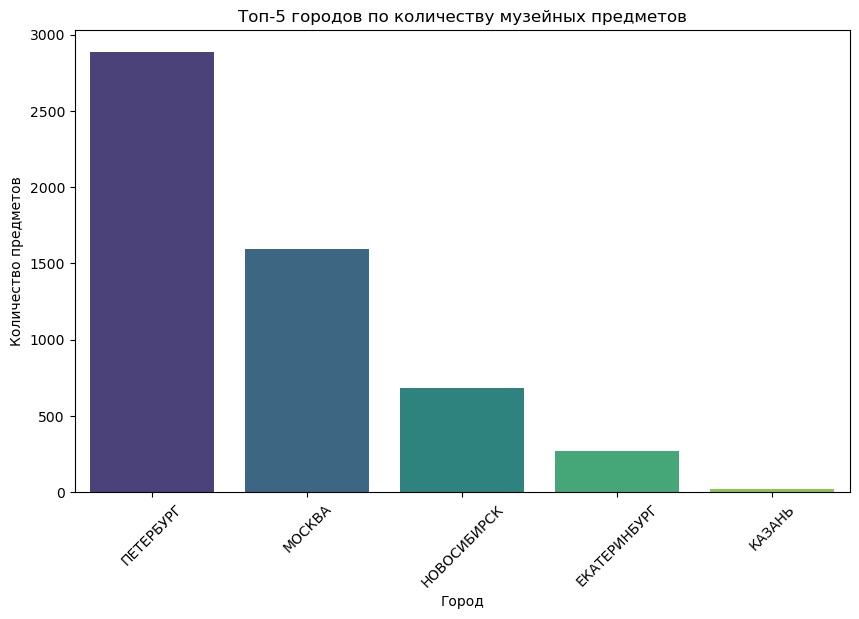

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
city_counts = df['city'].value_counts().head(5)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Топ-5 городов по количеству музейных предметов')
plt.xlabel('Город')
plt.ylabel('Количество предметов')
plt.xticks(rotation=45)
plt.show()

**Распределение предметов по городам**

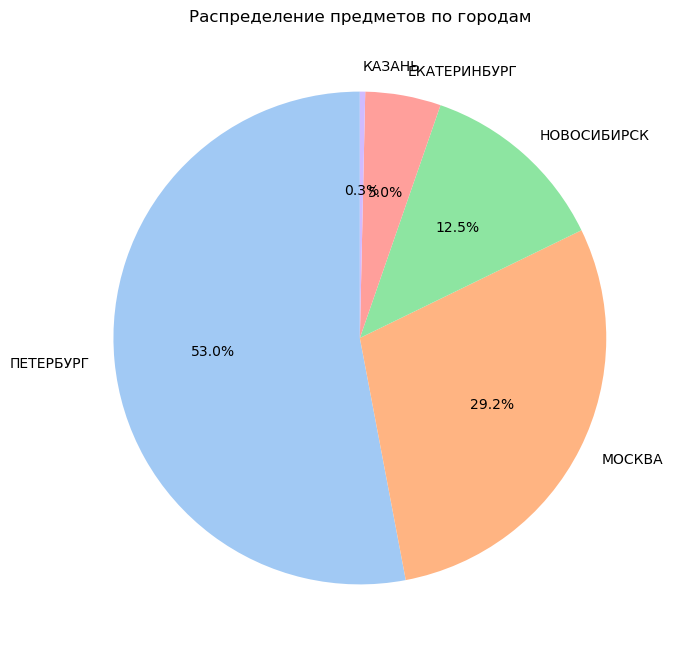

In [148]:
plt.figure(figsize=(8, 8))
city_counts = df['city'].value_counts()
plt.pie(city_counts, labels=city_counts.index, 
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Распределение предметов по городам')
plt.show()

**Распределение музейных предметов по типам**

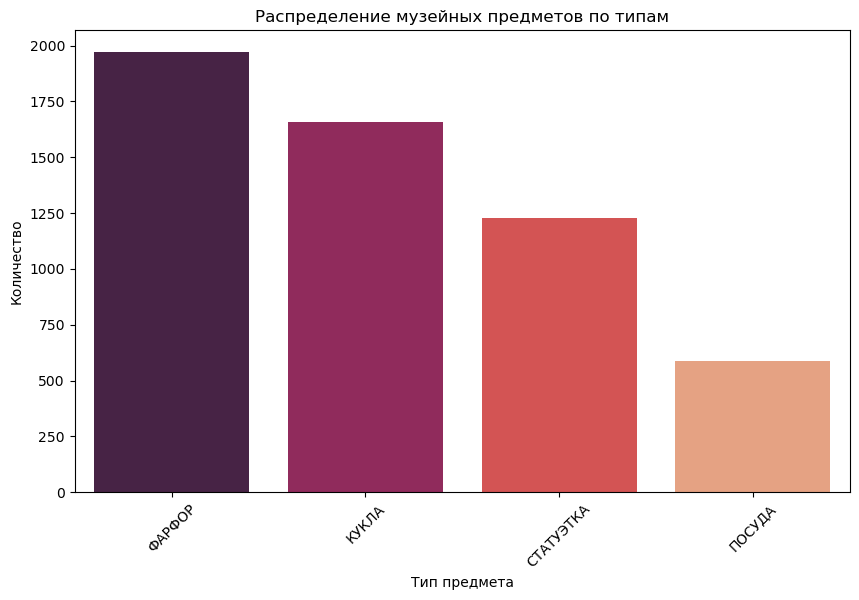

In [149]:
plt.figure(figsize=(10, 6))
type_counts = df['object_type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='rocket')
plt.title('Распределение музейных предметов по типам')
plt.xlabel('Тип предмета')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Топ-10 музеев по количеству предметов**

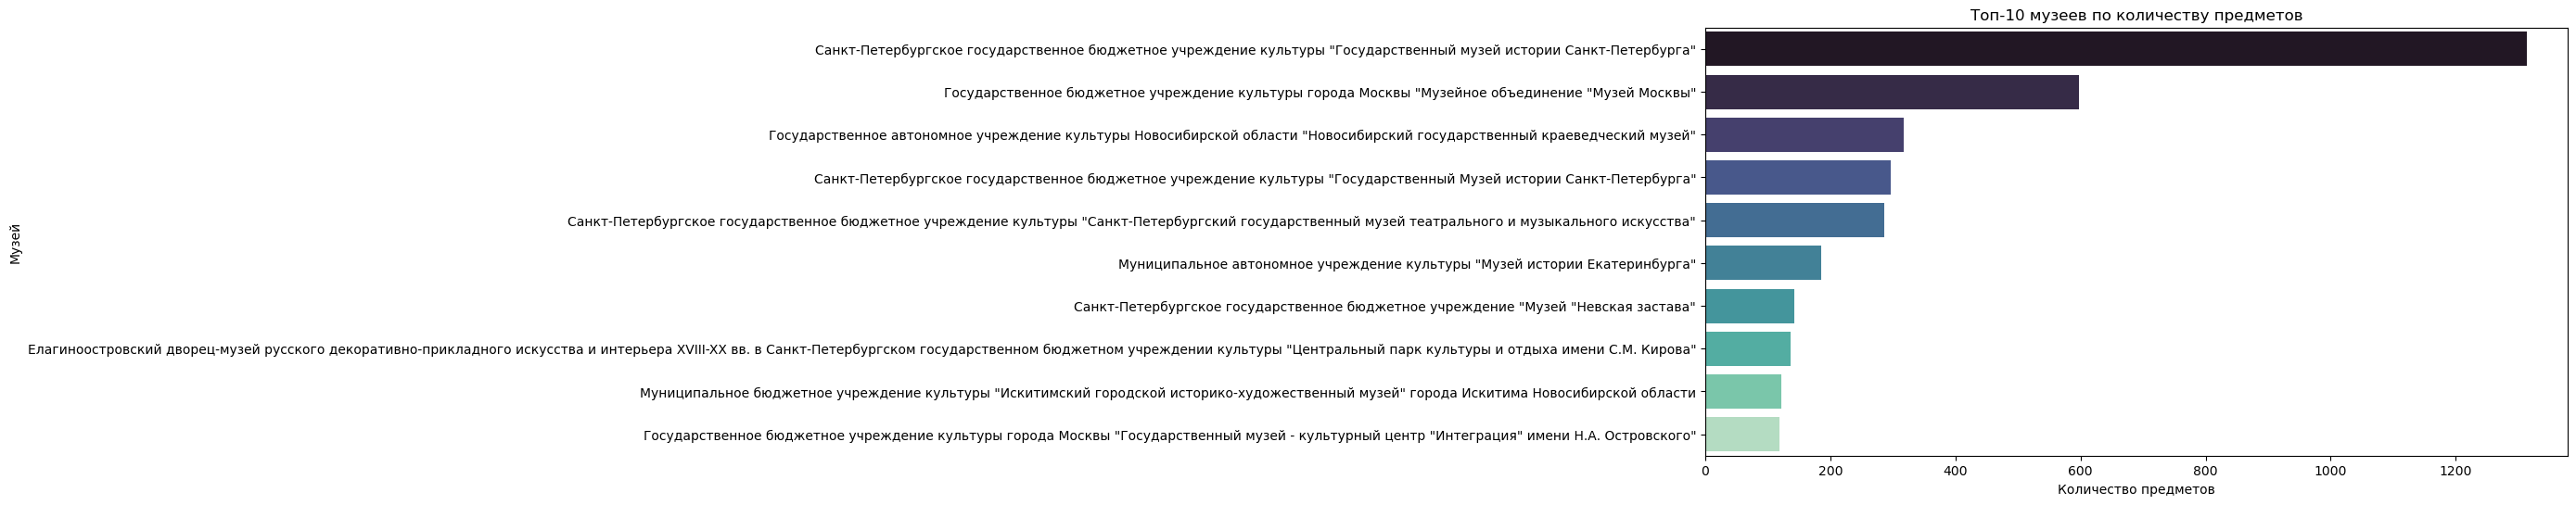

In [150]:
plt.figure(figsize=(12, 6))
museum_counts = df['data_museum_name'].value_counts().head(10)
sns.barplot(x=museum_counts.values, y=museum_counts.index, palette='mako')
plt.title('Топ-10 музеев по количеству предметов')
plt.xlabel('Количество предметов')
plt.ylabel('Музей')
plt.show()

**Анализ по годам регистрации экспонатов**

<Axes: title={'center': 'Поступление предметов в коллекцию по годам'}, xlabel='reg_year'>

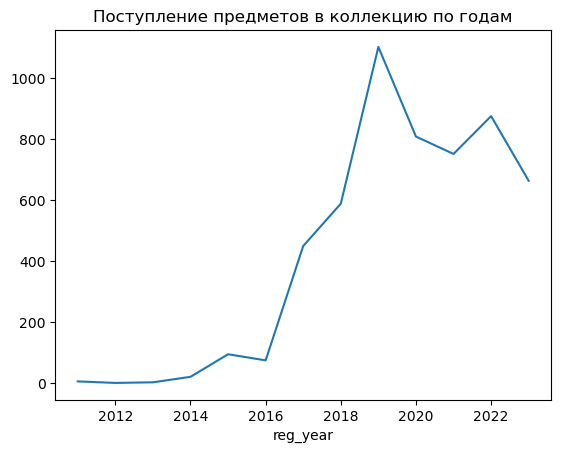

In [151]:
df['reg_year'] = pd.to_datetime(df['data_regDate']).dt.year
yearly_acquisition = df.groupby('reg_year').size()
yearly_acquisition.plot(title='Поступление предметов в коллекцию по годам')